In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Data Collection & Loading

In [2]:
sp_tracks = pd.read_csv('tracks.csv')
sp_features = pd.read_csv('SpotifyFeatures.csv')
sp_artists = pd.read_csv('artists.csv')

In [3]:
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
#checking info
sp_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
#descriptive statistics of tracks
sp_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [6]:
sp_features.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
sp_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [8]:
#descriptive statistics of feature
sp_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [9]:
sp_artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [10]:
sp_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [11]:
#descriptive statistics of artists
sp_artists.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,1104336.0,10743.044390,260955.390960,0.0,10.0,59.0,451.0,78900234.0
popularity,1104349.0,9.083884,13.763096,0.0,0.0,2.0,14.0,100.0


## 🧹 Data Cleaning & Preprocessing

In [12]:
#checking null
pd.isnull(sp_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [13]:
pd.isnull(sp_features).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [14]:
pd.isnull(sp_artists).sum()

id             0
followers     13
genres         0
name           0
popularity     0
dtype: int64

In [15]:
# Drop rows without a valid release_date or popularity
sp_tracks = sp_tracks.dropna(subset=['release_date', 'popularity'])

In [16]:
#convert release_date into datetime datatype
sp_tracks['release_date'] = pd.to_datetime(sp_tracks['release_date'])

# Extract year
sp_tracks['release_year'] = sp_tracks['release_date'].dt.year
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [17]:
#make the Release Date as the index column
sp_tracks.set_index('release_date', inplace = True)
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [18]:
#convert the song duration from Milliseconds to Seconds
sp_tracks['duration'] = sp_tracks['duration_ms'].apply(lambda x: round(x/1000))
sp_tracks.drop('duration_ms', inplace = True, axis = 1)
sp_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

In [19]:
sp_features['duration'] = sp_features['duration_ms'].apply(lambda x: round(x/1000))
sp_features.drop('duration_ms', inplace = True, axis = 1)
sp_features.duration.head()

0     99
1    137
2    170
3    152
4     83
Name: duration, dtype: int64

In [20]:
#normalise sp_artists['genres']
sp_artists['genres'] = sp_artists['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
sp_artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [21]:
# lowercase + strip whitespace
sp_artists['genres'] = sp_artists['genres'].apply(lambda lst: [g.lower().strip() for g in lst])
sp_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,[deep acoustic pop],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [22]:
sp_artists = sp_artists.explode('genres')
sp_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,NaN,Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,NaN,ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,NaN,Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,NaN,Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,NaN,Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,NaN,Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,deep acoustic pop,Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,NaN,Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,NaN,The Boy Band Project,0


In [23]:
#remove duplicates
sp_tracks = sp_tracks.drop_duplicates()
sp_features = sp_features.drop_duplicates()
sp_artists = sp_artists.drop_duplicates()

## 🔗 Data Merging

In [24]:
# Merge tracks and features
tracks_features = sp_tracks.merge(sp_features, left_on='id', right_on='track_id', suffixes=('_track', '_feat'))
tracks_features

,id,name,popularity_track,explicit,artists,id_artists,danceability_track,energy_track,key_track,loudness_track,...,instrumentalness_feat,key_feat,liveness_feat,loudness_feat,mode_feat,speechiness_feat,tempo_feat,time_signature_feat,valence_feat,duration_feat
0,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],0.614,0.0423,4,-12.033,...,0.002930,E,0.1830,-12.033,Major,0.0535,89.822,4/4,0.211,177
1,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",0.831,0.2620,8,-12.386,...,0.912000,G#,0.2040,-12.386,Major,0.0942,104.606,4/4,0.901,162
2,6qRvnXftofjYJm1Mg98UWL,Need a Little Sugar in My Bowl,27,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],0.693,0.0270,0,-13.506,...,0.000000,C,0.1340,-13.506,Minor,0.0562,75.749,4/4,0.402,168
3,5lpBC66XQzpVDJuknDUuZd,Baby Won't You Please Come Home,22,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],0.683,0.0534,0,-16.704,...,0.000335,C,0.1410,-16.704,Major,0.0356,79.488,4/4,0.440,176
4,6N1wS1e5bMOubmVtkDLNrt,Gimme a Pigfoot and a Bottle of Beer,16,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],0.691,0.1980,7,-11.164,...,0.008880,G,0.1540,-11.164,Minor,0.0784,103.901,4/4,0.558,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52447,6rsm9NTgl9kKPatf7S1yCS,Talk,61,0,"[""Why Don't We""]",['2jnIB6XdLvnJUeNTy5A0J2'],0.795,0.7000,6,-5.221,...,0.000000,F#,0.0977,-5.221,Minor,0.1070,120.002,4/4,0.798,190
52448,3JJYIoJ5FyY9E0DGjr7SXF,Enemies,62,0,['Lauv'],['5JZ7CnR6gTvEMKX4g70Amv'],0.696,0.6930,3,-4.640,...,0.000000,D#,0.1220,-4.640,Major,0.0440,126.025,4/4,0.601,195
52449,3JJYIoJ5FyY9E0DGjr7SXF,Enemies,62,0,['Lauv'],['5JZ7CnR6gTvEMKX4g70Amv'],0.696,0.6930,3,-4.640,...,0.000000,D#,0.1220,-4.640,Major,0.0440,126.025,4/4,0.601,195
52450,54j7EaJPDmSZYcNYvLSJ78,Trust Fund Baby,66,0,"[""Why Don't We""]",['2jnIB6XdLvnJUeNTy5A0J2'],0.624,0.7850,8,-3.337,...,0.000000,G#,0.1350,-3.337,Major,0.0498,163.929,4/4,0.593,184


## 📊 Exploratory Data Analysis (EDA)

### A. Popularity & Trends

In [25]:
#finding 10 least popular songs
bottom_10_tracks = sp_tracks.sort_values('popularity', ascending = True).head(10)
bottom_10_tracks[['name', 'popularity']]

,name,popularity
release_date,,
1935-02-20,"Newspaper Reports On Abner, 20 February 1935",0
1949-01-01,恋は水の上で,0
1949-01-01,私の誕生日,0
1949-01-01,エル・チョクロ (EL CHOCLO),0
1949-01-01,恋は不思議なもの,0
1949-01-01,ゆうべはどうしたの (WHATSA MALLA U),0
1949-04-10,"Screen Director's Playhouse, Music For Million...",0
1949-01-01,ブルーマンボ,0
1949-05-19,"Screen Director's Playhouse, Trade Winds direc...",0


In [26]:
#finding top 10 popular songs
top_10_tracks = sp_tracks[sp_tracks['popularity'] > 90].sort_values('popularity', ascending = False).head(10)
top_10_tracks[['name', 'artists', 'popularity']]

,name,artists,popularity
release_date,,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
2021-01-08,drivers license,['Olivia Rodrigo'],99
2021-01-06,Astronaut In The Ocean,['Masked Wolf'],98
2020-03-20,Save Your Tears,['The Weeknd'],97
2020-12-04,telepatía,['Kali Uchis'],97
2020-03-20,Blinding Lights,['The Weeknd'],96
2021-03-05,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
2020-09-16,The Business,['Tiësto'],95
2019-11-07,Streets,['Doja Cat'],94


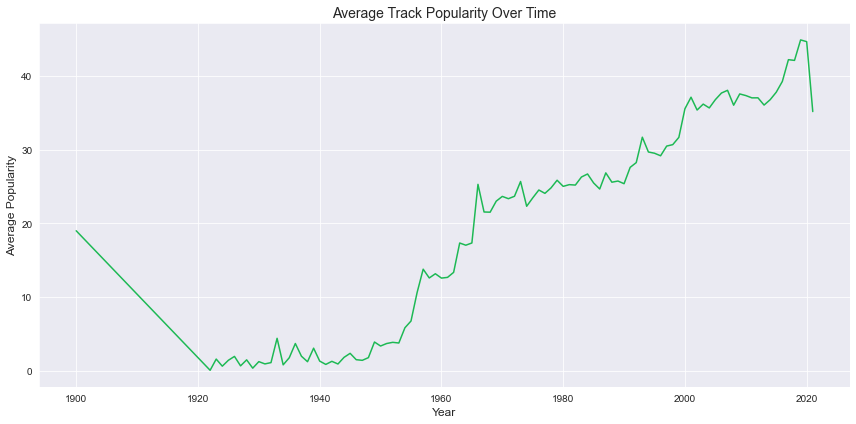

In [40]:
pop_by_year = sp_tracks.groupby('release_year')['popularity'].mean().reset_index()

sns.set_style('darkgrid') 
plt.figure(figsize=(12,6))
sns.lineplot(data=pop_by_year, x='release_year', y='popularity', color='#1DB954')
plt.title('Average Track Popularity Over Time', fontsize=14)  
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.show()


##### ✅ Insight: This can show whether newer songs are more popular, and if there's a spike in certain eras (e.g., 2010–2020).

### B. Temporal Analysis

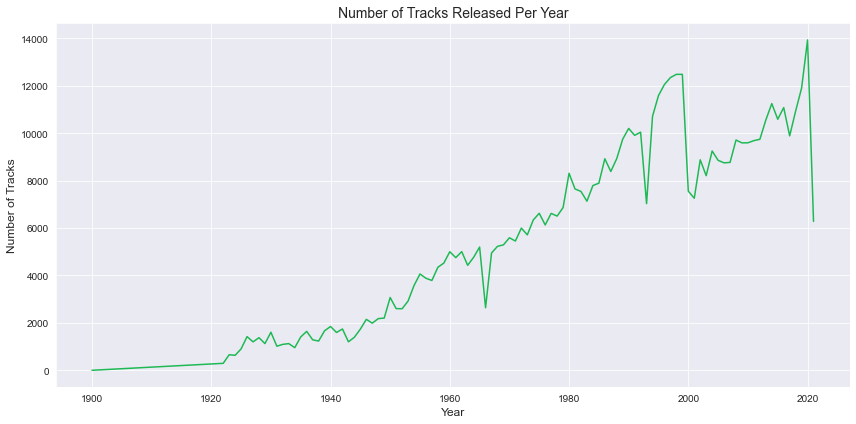

In [41]:
tracks_per_year = sp_tracks.groupby('release_year')['id'].count().reset_index()
tracks_per_year.columns = ['release_year', 'track_count']

plt.figure(figsize=(12,6))
sns.lineplot(data=tracks_per_year, x='release_year', y='track_count', color='#1DB954')
plt.title('Number of Tracks Released Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


##### ✅ Insight: Are more tracks being released in modern years? Is there a spike post-2000s due to streaming?

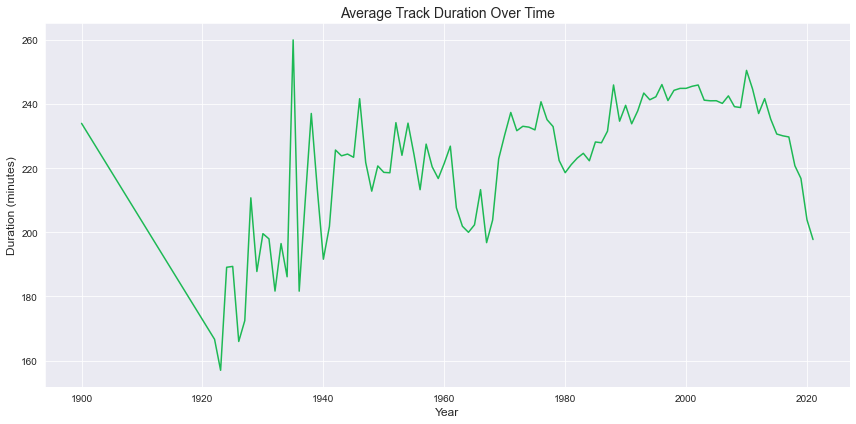

In [42]:
# sp_tracks['duration_min'] = sp_tracks['duration_ms'] / 60000

duration_by_year = sp_tracks.groupby('release_year')['duration'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=duration_by_year, x='release_year', y='duration', color='#1DB954')
plt.title('Average Track Duration Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


##### ✅ Insight: Are modern songs becoming more energetic or mellow over time?



[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'release_year'),
 Text(12.5, 0, 'duration')]

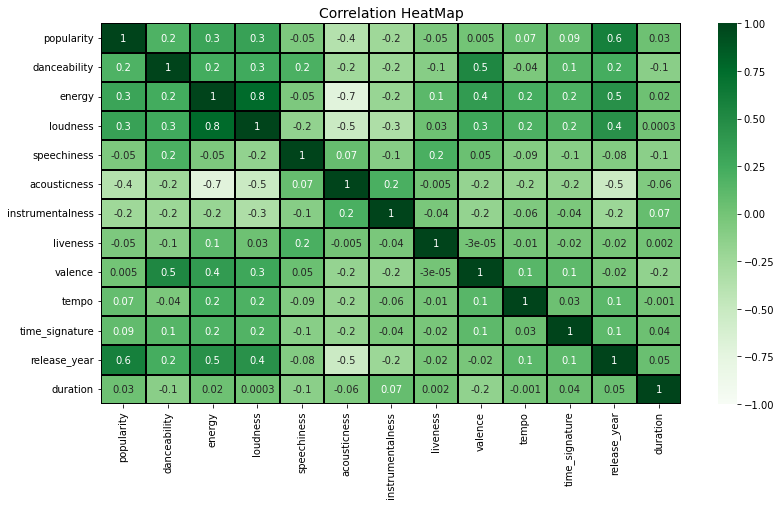

In [30]:
#correlation HeatMap using Pearson Correlation method between two variables
td = sp_tracks.drop(['key', 'mode', 'explicit'], axis = 1).corr(method = 'pearson')
plt.figure(figsize = (13,7))
hmap = sns.heatmap(
    td, 
    annot = True, 
    fmt = '.1g', 
    vmin = -1, 
    vmax = 1, 
    center = 0, 
    cmap = 'Greens', 
    linewidths = 0.1, 
    linecolor = 'black')
hmap.set_title('Correlation HeatMap', fontsize = 14)
hmap.set_xticklabels(hmap.get_xticklabels(), rotation = 90)

### 🔥 Correlation Analysis Key Findings

- **Energetic, danceable, and louder tracks** are more likely to be popular.
- **Acoustic and instrumental songs** generally show lower popularity.
- **Strong correlations**:
  - Energy ↔ Loudness (0.8)
  - Energy ↔ Acousticness (−0.7)
- **Temporal trend**: Newer tracks tend to be more energetic and popular, aligning with modern music preferences.

These insights can help inform playlist curation, hit prediction models, or understanding streaming-era trends in music.


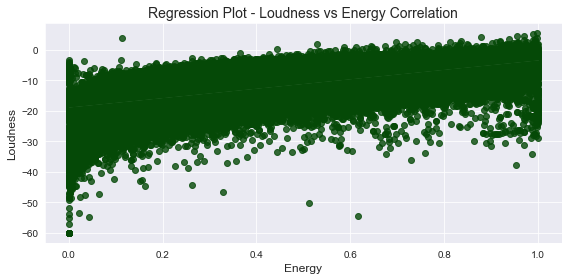

In [43]:
#create a Regression Plot between Loadness & Energy
plt.figure(figsize = (8,4))
sns.regplot(data = sp_tracks, y = 'loudness', x = 'energy', color = '#054907')
plt.title('Regression Plot - Loudness vs Energy Correlation', fontsize=14) 
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Loudness', fontsize=12)
plt.tight_layout()
plt.show()

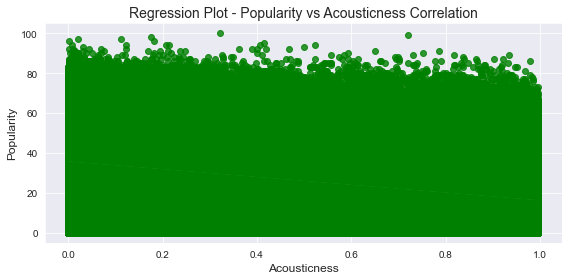

In [44]:
#create a Regression Plot between Popularity & Acousticness 
plt.figure(figsize = (8,4))
sns.regplot(data = sp_tracks, y = 'popularity', x = 'acousticness', color='#008000')
plt.title('Regression Plot - Popularity vs Acousticness Correlation', fontsize=14) 
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.tight_layout()
plt.show()

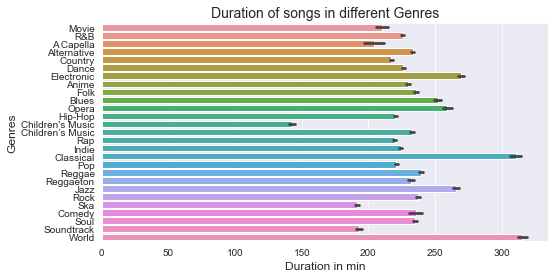

In [59]:
plt.figure(figsize=(8,4))
sns.color_palette('crest', as_cmap=True)
sns.barplot(y='genre', x='duration', data=sp_features)
plt.title('Duration of songs in different Genres', fontsize=14)
plt.xlabel('Duration in min', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()

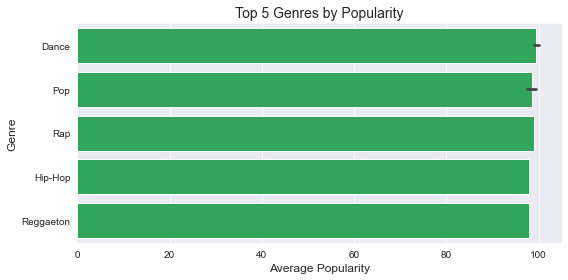

In [45]:
#Find top five genres by Popularity and pot a barplot for the same.
plt.figure(figsize=(8,4))
Top = sp_features.sort_values('popularity', ascending=False)[:10]
sns.barplot(y = 'genre', x = 'popularity', data = Top, color='#1DB954')
plt.title('Top 5 Genres by Popularity', fontsize=14) 
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

### 🔥 Top Genres by Popularity — Insights

- The most popular genres on Spotify are **Dance, Pop, Rap, Hip-Hop, and Reggaeton**, all scoring near-perfect average popularity.
- This highlights the dominance of **rhythmic, high-energy genres** in current global music consumption.
- Genre popularity may reflect algorithmic influence (e.g., playlist placement), listener mood preferences, or social media trends.
